In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling    
from collections import Counter
my_local_path="B:/UPX docs/attachment_Project_Datasets/Project Datasets/attachment_Project_1_NYC-Flight_data/Project_1_NYC-Flight data/"


In [4]:
flight_data = pd.read_csv(my_local_path+'flight_data.csv')
flight_data.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


# Replacing NAN values in dep_delay by mean departure delay

In [5]:
by_month_depdelay=flight_data.groupby(['month','origin']).mean()

def depdelay_val(series):
    return series.fillna(series.mean())
flight_data.dep_delay=flight_data['dep_delay'].transform(depdelay_val)
#flight_data.iloc[319182:320158,:]


In [6]:
Delay_months = flight_data.groupby('month').mean()
Delay_months


,year,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
month,,,,,,,,,,,,,
1,2013.0,15.991261,1347.209531,1340.909532,10.086874,1523.154526,1547.597874,6.129972,1958.625426,154.187401,1006.843616,13.157125,25.197045
2,2013.0,14.743617,1347.574462,1342.478257,10.908936,1522.206593,1547.108853,5.613019,1956.268406,151.346364,1000.982285,13.172458,25.232456
3,2013.0,15.995665,1359.499768,1354.202816,13.209518,1509.742977,1546.235139,5.807577,2003.472428,149.076984,1011.987099,13.287577,25.445100
4,2013.0,15.429827,1353.269684,1351.048747,13.907409,1500.704490,1536.894140,11.176063,1978.577939,153.101146,1038.732580,13.250053,26.043452
5,2013.0,15.993020,1351.168207,1345.295215,12.980060,1502.684660,1533.465898,3.521509,1986.241040,145.727496,1040.912905,13.186623,26.632900
6,2013.0,15.598626,1350.841081,1346.389088,20.553122,1467.993670,1526.858372,16.481330,1935.192048,150.325245,1057.125235,13.192083,27.180788
7,2013.0,16.193373,1353.160892,1347.332846,21.437442,1455.943802,1520.662634,16.711307,1958.943415,146.728272,1058.596398,13.202515,27.081359
8,2013.0,15.833907,1350.237648,1344.878644,12.611504,1495.367961,1519.395608,6.040652,1960.480956,148.160419,1062.138439,13.179561,26.922495
9,2013.0,15.601581,1334.108694,1334.649271,6.819463,1503.549280,1534.127620,-4.018364,2026.244506,143.471196,1041.249946,13.082904,26.358853


In [7]:
Delay_months1 = pd.pivot_table(flight_data, index = ['flight'], values=('dep_delay'), columns = ['month'],aggfunc= np.sum)
delay_month=Delay_months1.sum(axis=0)
delay_month


month
1     272385.955604
2     272188.867594
3     380883.239492
4     393996.898932
5     373773.796555
6     580481.821890
7     630796.726042
8     369857.588145
9     188039.859756
10    181891.820581
11    149889.903370
12    462349.047014
dtype: float64

# Ploting Average delay and total delay across all months in 2013

Text(0,0.5,'Total delay in a month (in minutes)')

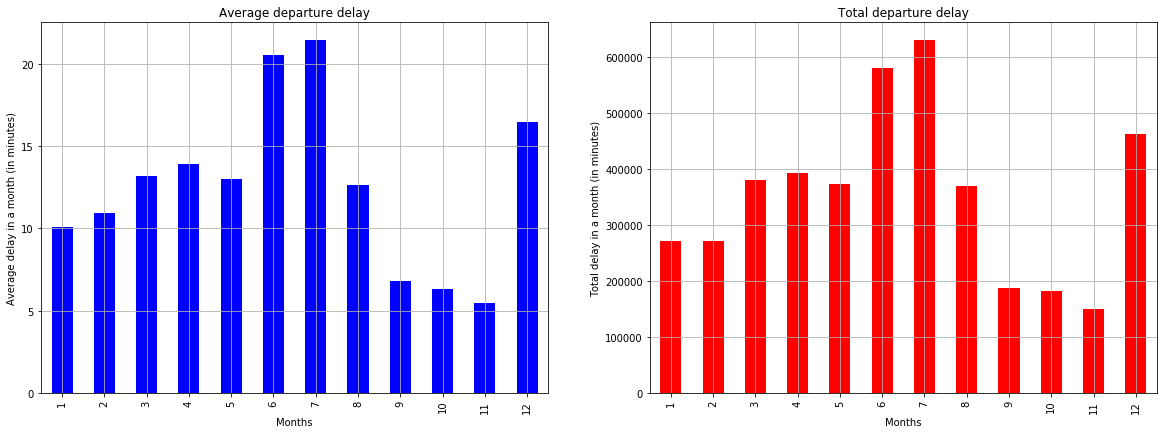

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
Delay_months['dep_delay'].plot(kind='bar',color='blue',grid=display)
plt.title('Average departure delay')
plt.xlabel('Months')
plt.ylabel('Average delay in a month (in minutes)')
plt.subplot(2,2,2)
delay_month.plot(kind='bar',color='red',grid=display)
plt.title('Total departure delay')
plt.xlabel('Months')
plt.ylabel('Total delay in a month (in minutes)')


origin        EWR        JFK        LGA
month                                  
1       14.851218   8.659743   5.802635
2       13.043801  11.830917   7.243812
3       17.910033  10.758402  10.317365
4       17.282514  12.256844  11.538416
5       15.302033  12.520807  10.677489
6       22.106529  20.298067  18.995416
7       21.784850  23.534954  18.674760
8       13.479111  12.911793  11.277578
9        7.371035   6.697777   6.360540
10       8.672881   4.623359   5.391999
11       6.773129   4.711367   4.870312
12      20.623346  14.745348  13.550597


Text(0.5,1,'Delay by Origin')

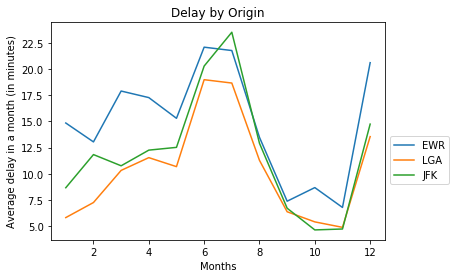

In [9]:
%matplotlib inline
Delay_by_origin = pd.pivot_table(flight_data, index = ['month'], values=('dep_delay'), columns = ['origin'],aggfunc= np.mean)
print(Delay_by_origin)
plt.figure(figsize=(20,20))
Delay_by_origin[['EWR', 'LGA', 'JFK']].plot().legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xlabel('Months')
plt.ylabel('Average delay in a month (in minutes)')
plt.title('Delay by Origin')


# Departure delay by individual Flight Carrier

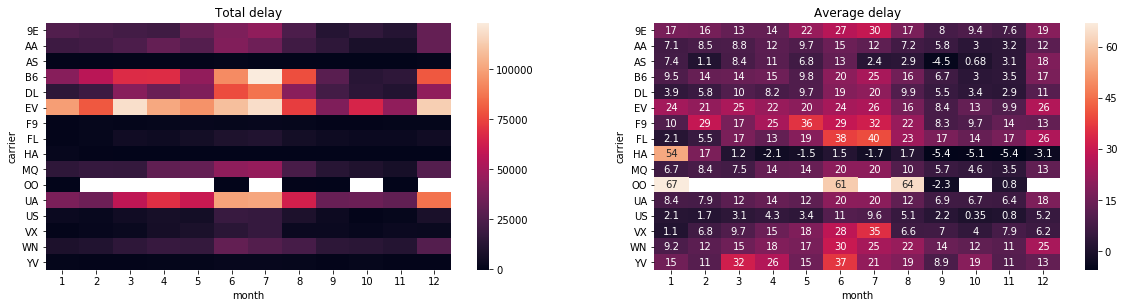

In [10]:
plt.figure(figsize=(20,10))
flights_sum_delay = pd.pivot_table(flight_data,index=["carrier"], values=('dep_delay'), columns = ['month'],aggfunc= np.sum)
plt.subplot(2,2,1)
plt.title("Total delay")
sns.heatmap(flights_sum_delay, annot=False)
flights_mean_delay = pd.pivot_table(flight_data,index=["carrier"], values=('dep_delay'), columns = ['month'],aggfunc= np.mean)
#print(flights_mean_delay)
plt.subplot(2,2,2)
plt.title("Average delay")
sns.heatmap(flights_mean_delay, annot=True)




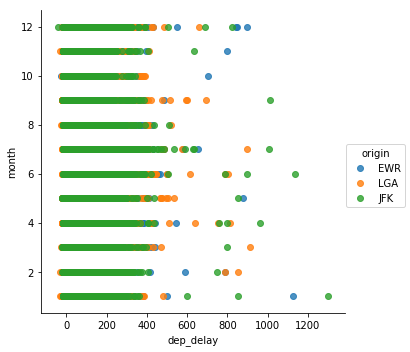

In [11]:
plt.figure(figsize=(20,30))
sns.lmplot('dep_delay','month',data=flight_data, fit_reg = False, hue='origin')

# FILLING MISSING VALUES IN AIRTIME
- sort by distance
- interpolate the airtime values
- first NAN value is replaced by minumum aircraft speed required by plane to fly


In [13]:
result = flight_data.sort_values(['distance'])
#result1 = pd.DataFrame(result['air_time'].fillna(method='bfill'))
filled_flight_data = result
filled_flight_data.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
275945,2013,7,27,NaN,106,12.63907,NaN,245,NaN,US,1632,NaN,EWR,LGA,NaN,17,1,6,27-07-2013 01:00
3083,2013,1,4,1240.0,1200,40.00000,1333.0,1306,27.0,EV,4193,N14972,EWR,PHL,30.0,80,12,0,04-01-2013 12:00
16328,2013,1,19,1617.0,1617,0.00000,1722.0,1722,0.0,EV,4616,N12540,EWR,PHL,34.0,80,16,17,19-01-2013 16:00
112178,2013,2,1,2128.0,2129,-1.00000,2216.0,2224,-8.0,EV,4619,N13969,EWR,PHL,24.0,80,21,29,01-02-2013 21:00
19983,2013,1,23,2128.0,2129,-1.00000,2221.0,2224,-3.0,EV,4619,N12135,EWR,PHL,23.0,80,21,29,23-01-2013 21:00


In [14]:
fill_airtime = pd.DataFrame(filled_flight_data['air_time'].interpolate(method='linear'))
#fill_airtime.to_csv(my_local_path+'fill_airtime.csv')
filled_flight_data['air_time']=fill_airtime['air_time'].values


# FLIGHT SPEED

In [16]:
flight_time_hours = filled_flight_data.air_time / 60
filled_flight_data['air_time_hrs']=pd.Series(flight_time_hours)
filled_flight_data
speed = filled_flight_data.distance / filled_flight_data.air_time_hrs
speed.round(0)
filled_flight_data['flight_speed']=pd.Series(speed.round(0))
speed_analysis = filled_flight_data
speed_analysis.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,air_time_hrs,flight_speed
275945,2013,7,27,NaN,106,12.63907,NaN,245,NaN,US,...,NaN,EWR,LGA,NaN,17,1,6,27-07-2013 01:00,NaN,NaN
3083,2013,1,4,1240.0,1200,40.00000,1333.0,1306,27.0,EV,...,N14972,EWR,PHL,30.0,80,12,0,04-01-2013 12:00,0.500000,160.0
16328,2013,1,19,1617.0,1617,0.00000,1722.0,1722,0.0,EV,...,N12540,EWR,PHL,34.0,80,16,17,19-01-2013 16:00,0.566667,141.0
112178,2013,2,1,2128.0,2129,-1.00000,2216.0,2224,-8.0,EV,...,N13969,EWR,PHL,24.0,80,21,29,01-02-2013 21:00,0.400000,200.0
19983,2013,1,23,2128.0,2129,-1.00000,2221.0,2224,-3.0,EV,...,N12135,EWR,PHL,23.0,80,21,29,23-01-2013 21:00,0.383333,209.0


In [18]:
speed_analysis[['flight_speed']]=speed_analysis[['flight_speed']].fillna('160')
#speed_analysis.to_csv(my_local_path+'speed_analysis1.csv')
speed_analysis_filled=speed_analysis
#speed_analysis['flight_speed'].describe()
speed_analysis_filled.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,air_time_hrs,flight_speed
275945,2013,7,27,NaN,106,12.63907,NaN,245,NaN,US,...,NaN,EWR,LGA,NaN,17,1,6,27-07-2013 01:00,NaN,160
3083,2013,1,4,1240.0,1200,40.00000,1333.0,1306,27.0,EV,...,N14972,EWR,PHL,30.0,80,12,0,04-01-2013 12:00,0.500000,160
16328,2013,1,19,1617.0,1617,0.00000,1722.0,1722,0.0,EV,...,N12540,EWR,PHL,34.0,80,16,17,19-01-2013 16:00,0.566667,141
112178,2013,2,1,2128.0,2129,-1.00000,2216.0,2224,-8.0,EV,...,N13969,EWR,PHL,24.0,80,21,29,01-02-2013 21:00,0.400000,200
19983,2013,1,23,2128.0,2129,-1.00000,2221.0,2224,-3.0,EV,...,N12135,EWR,PHL,23.0,80,21,29,23-01-2013 21:00,0.383333,209


Average speed  406.49774774728223


Text(0.5,1,'Speed analysis(2013)')

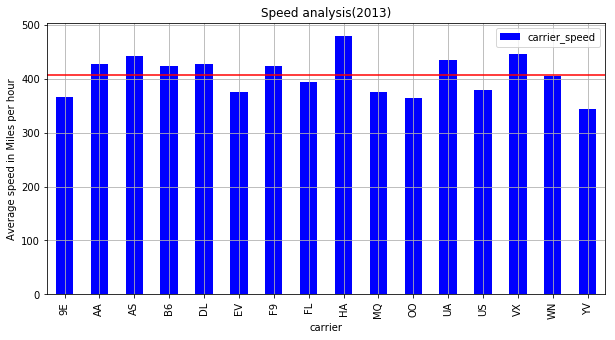

In [19]:
carrier_speed_df = speed_analysis_filled.groupby(['carrier']).mean()
carrier_speed_df
carrier_speed = carrier_speed_df.distance / carrier_speed_df.air_time_hrs
t = carrier_speed.mean(axis=0)
carrier_speed_df['carrier_speed']=pd.Series(carrier_speed.round(0))
carrier_speed_df
#carrier_speed_series = carrier_speed['average_speed'].mean
#print(carrier_speed_series)
#average_speed_all_carriers = carrier_speed_series(axis=0)
#print(average_speed_all_carriers)
print('Average speed ',t)
plt.figure(figsize=(10,5))
carrier_speed_df['carrier_speed'].plot(kind='bar',color='blue',grid=display,legend='best')
plt.axhline(y=t,color = 'r')
plt.ylabel('Average speed in Miles per hour')
plt.title('Speed analysis(2013)')
#plt.axvline(y=t, linewidth=2, color = 'g')


In [20]:
speed_flight = carrier_speed > t
speed_flight


carrier
9E    False
AA     True
AS     True
B6     True
DL     True
EV    False
F9     True
FL    False
HA     True
MQ    False
OO    False
UA     True
US    False
VX     True
WN    False
YV    False
dtype: bool

# DESTINATION ANALYSIS

17283 flights headed to ORD 
1 flight headed to LEX 


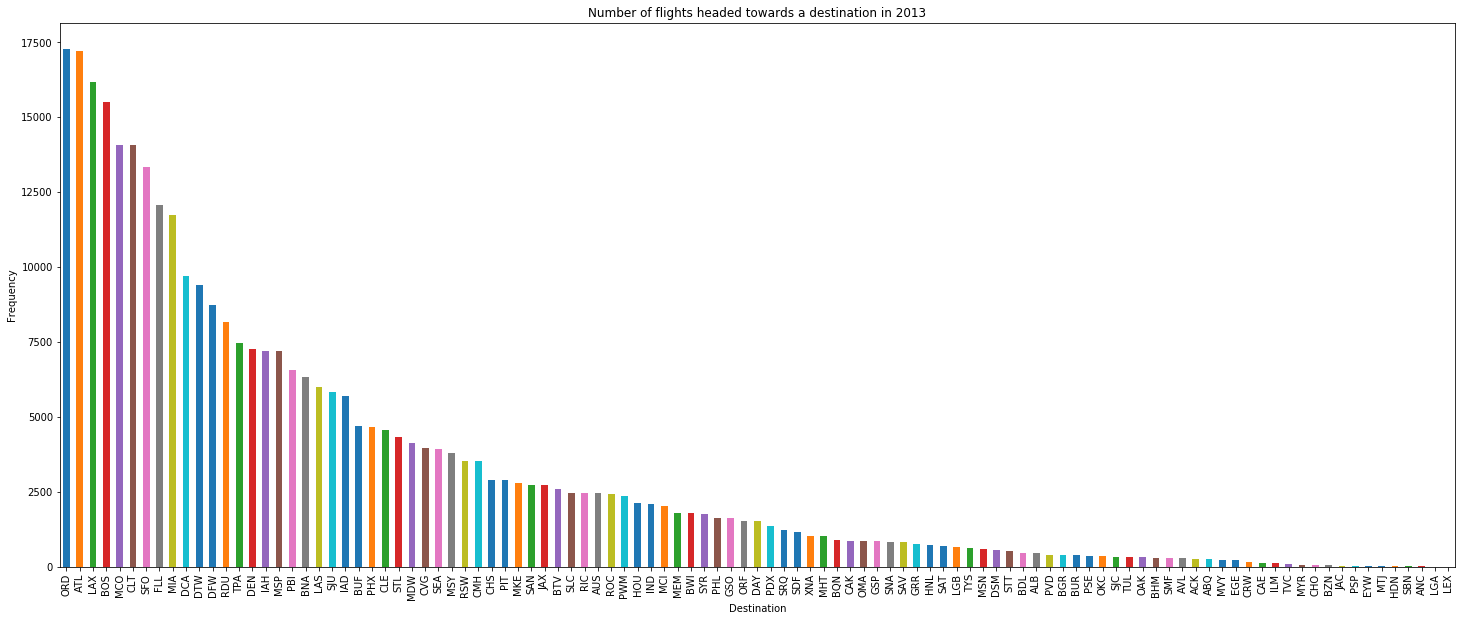

In [21]:
flight_dest = speed_analysis_filled['dest'].value_counts()
plt.figure(figsize=(25,10))
flight_dest.plot(kind='bar')
#Esns.barplot(flight_dest)
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.title('Number of flights headed towards a destination in 2013')
print(flight_dest.max() ,'flights headed to ORD ')
print(flight_dest.min() ,'flight headed to LEX ')

# ON TIME ARRIVAL ANALYSIS

In [22]:
speed_analysis.sort_values(['time_hour'])

def arr_delay_val(series3):
    return series3.fillna(series3.mean())
speed_analysis.arr_delay=speed_analysis['arr_delay'].transform(arr_delay_val)


Text(0.5,1,'Departure Delay by Origin')

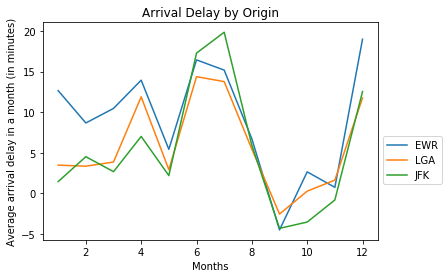

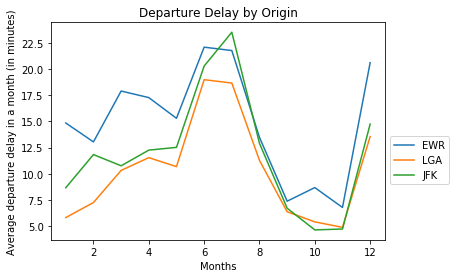

In [23]:
%matplotlib inline
arr_Delay_by_origin = pd.pivot_table(speed_analysis, index = ['month'], values=('arr_delay'), columns = ['origin'],aggfunc= np.mean)
#print(arr_Delay_by_origin)

arr_Delay_by_origin[['EWR', 'LGA', 'JFK']].plot().legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xlabel('Months')
plt.ylabel('Average arrival delay in a month (in minutes)')
plt.title('Arrival Delay by Origin')

Delay_by_origin[['EWR', 'LGA', 'JFK']].plot().legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xlabel('Months')
plt.ylabel('Average departure delay in a month (in minutes)')
plt.title('Departure Delay by Origin')


In [24]:
mean_arrival_delay = speed_analysis['arr_delay'].mean()
arrival_sd = speed_analysis['arr_delay'].std()
arrival_max=speed_analysis['arr_delay'].max()
arrival_min=speed_analysis['arr_delay'].min()
print("Mean arrival delay  ",mean_arrival_delay)
print("Stansard deviation  ",arrival_sd)
print("Maximum arrival delay  ",arrival_max)
print("Minimum arrival delay  ",arrival_min)

Mean arrival delay   6.8953767573144376
Stansard deviation   44.00396904994001
Maximum arrival delay   1272.0
Minimum arrival delay   -86.0


# PERCENTAGE ON TIME ARRIVAL ANALYSIS

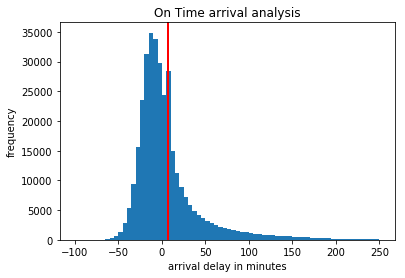

total number of flights   336776

number of flights with negative arrival delay   188933
percentage of flight having negative delay   56.10049409696653

number of flights with positive arrival delay   142434
percentage of flight having positive delay   42.293393828538846

number of flights which are right on time   5409
percentage of flight having delay less than average   1.6061120744946196

number of flights with arrival delay less than average delay   221519
percentage of flight having delay less than average   65.77636173599069

number of flights with arrival delay greater than average delay   115257
percentage of flight having delay less than average   34.22363826400931


In [25]:
plt.hist(speed_analysis.arr_delay,range=(-100,250), bins = 70)
mean_arrival_delay = speed_analysis['arr_delay'].mean()
plt.axvline(x=mean_arrival_delay, linewidth=2, color = 'r')
plt.xlabel('arrival delay in minutes')
plt.ylabel('frequency')
plt.title('On Time arrival analysis')
plt.show()

speed_analysis_count4 = pd.Series(speed_analysis.arr_delay)
print('total number of flights  ',speed_analysis_count4.count())

speed_analysis_count = pd.Series(speed_analysis.arr_delay)
speed_analysis_count = speed_analysis_count[speed_analysis_count < 0]
print('\nnumber of flights with negative arrival delay  ', speed_analysis_count.count())
per_neg_delay = (speed_analysis_count.count())*(100/speed_analysis_count4.count())
print('percentage of flight having negative delay  ', per_neg_delay)

speed_analysis_count0 = pd.Series(speed_analysis.arr_delay)
speed_analysis_count0 = speed_analysis_count0[speed_analysis_count0 > 0]
print('\nnumber of flights with positive arrival delay  ', speed_analysis_count0.count())
per_pos_delay = (speed_analysis_count0.count())*(100/speed_analysis_count4.count())
print('percentage of flight having positive delay  ', per_pos_delay)

speed_analysis_count3 = pd.Series(speed_analysis.arr_delay)
speed_analysis_count3 = speed_analysis_count3[speed_analysis_count3 == 0]
print('\nnumber of flights which are right on time  ', speed_analysis_count3.count())
per_on_time = (speed_analysis_count3.count())*(100/speed_analysis_count4.count())
print('percentage of flight having delay less than average  ', per_on_time)

speed_analysis_count1 = pd.Series(speed_analysis.arr_delay)
speed_analysis_count1 = speed_analysis_count1[speed_analysis_count1 < mean_arrival_delay]
print('\nnumber of flights with arrival delay less than average delay  ', speed_analysis_count1.count())
per_neg_avg_delay = (speed_analysis_count1.count())*(100/speed_analysis_count4.count())
print('percentage of flight having delay less than average  ', per_neg_avg_delay)

speed_analysis_count2 = pd.Series(speed_analysis.arr_delay)
speed_analysis_count2 = speed_analysis_count2[speed_analysis_count2 > mean_arrival_delay]
print('\nnumber of flights with arrival delay greater than average delay  ', speed_analysis_count2.count())
per_pos_avg_delay = (speed_analysis_count2.count())*(100/speed_analysis_count4.count())
print('percentage of flight having delay less than average  ', per_pos_avg_delay)
